乐学偶得版权所有  公众号：乐学Fintech  主讲人：William 网站：lexueoude.com  <br> LX_LAB教研团队提供技术支持 正版视频： 网易云课堂：乐学偶得

随机振荡器(不要被这个中文吓到，其实就是一种动量指标)
ramdon walk

比如说：我们想看一个月(30天)的通道

%K $= 100* \frac{Price-L_{30}}{H_{30}-L_{30}} $ <br>
%D $=\frac{K_1+K_2+K_3}{3}$

推广到一般情况：
RSV(Raw Stochastic Value)未成熟随机值

$RSV = \frac{C_n-L_n}{H_n-L_n}*100$
可以通过调整n来自定义指标


KDJ,相当于就是%K,和%D的基础上，再加上一条线%J：

1）谁是快线？谁是慢线？
%K为快线，%D为慢线

2）那么什么是第三根%J线？

$K_t = \frac{2}{3}*K_{t-1}+\frac{1}{3}*RSV_t$ <br>
$D_t = \frac{2}{3}*D_{t-1}+\frac{1}{3}*K_t$ <br>
$J_t = 3* K_{t}-2*D_{t} $



若无前一日数据，用50代替


In [1]:
import tushare as ts
import pandas as pd
ts.set_token('09e4ce601d278a47514902d805936146d469550c6ec9c3b42d1d2343')
pro = ts.pro_api()
df_whole = pro.daily(ts_code='000001.SZ', start_date='20190101', end_date='2020401')
df_whole.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20200522,13.33,13.34,12.92,12.92,13.40,-0.48,-3.5821,856237.33,1119433.491
1,000001.SZ,20200521,13.52,13.57,13.36,13.40,13.51,-0.11,-0.8142,552312.00,742797.057
2,000001.SZ,20200520,13.38,13.62,13.27,13.51,13.36,0.15,1.1228,690851.07,929928.885
3,000001.SZ,20200519,13.41,13.45,13.27,13.36,13.20,0.16,1.2121,600368.64,801755.671
4,000001.SZ,20200518,13.20,13.34,13.12,13.20,13.23,-0.03,-0.2268,637208.57,843479.669


In [2]:
df_whole["trade_date"]=pd.to_datetime(df_whole["trade_date"],format="%Y%m%d")

In [3]:
df_whole["trade_date"].head()

0   2020-05-22
1   2020-05-21
2   2020-05-20
3   2020-05-19
4   2020-05-18
Name: trade_date, dtype: datetime64[ns]

In [4]:
df_whole.set_index("trade_date",inplace=True)

In [5]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2020-05-22,000001.SZ,13.33,13.34,12.92,12.92,13.40,-0.48,-3.5821,856237.33,1119433.491
2020-05-21,000001.SZ,13.52,13.57,13.36,13.40,13.51,-0.11,-0.8142,552312.00,742797.057
2020-05-20,000001.SZ,13.38,13.62,13.27,13.51,13.36,0.15,1.1228,690851.07,929928.885
2020-05-19,000001.SZ,13.41,13.45,13.27,13.36,13.20,0.16,1.2121,600368.64,801755.671
2020-05-18,000001.SZ,13.20,13.34,13.12,13.20,13.23,-0.03,-0.2268,637208.57,843479.669


In [6]:
df_whole=df_whole.sort_index(ascending=True)

In [7]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2019-01-02,000001.SZ,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109
2019-01-03,000001.SZ,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707
2019-01-04,000001.SZ,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888
2019-01-07,000001.SZ,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430
2019-01-08,000001.SZ,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795


In [8]:
low_price_list = df_whole['low'].rolling(window=9).min()

In [9]:
low_price_list.head()

trade_date
2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-07   NaN
2019-01-08   NaN
Name: low, dtype: float64

In [10]:
high_price_list = df_whole['high'].rolling(window=9).max()

In [11]:
high_price_list.head()

trade_date
2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-07   NaN
2019-01-08   NaN
Name: high, dtype: float64

In [12]:
df_whole['close'].head()

trade_date
2019-01-02    9.19
2019-01-03    9.28
2019-01-04    9.75
2019-01-07    9.74
2019-01-08    9.66
Name: close, dtype: float64

In [13]:
RSV = (df_whole['close']-low_price_list)/(high_price_list-low_price_list)*100

In [14]:
type(RSV)

pandas.core.series.Series

In [15]:
RSV

trade_date
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
2019-01-09          NaN
2019-01-10          NaN
2019-01-11          NaN
2019-01-14    87.272727
2019-01-15    96.460177
2019-01-16    98.437500
2019-01-17    66.315789
2019-01-18    85.263158
2019-01-21    73.563218
2019-01-22    59.154930
2019-01-23    57.692308
2019-01-24    90.000000
2019-01-25    95.789474
2019-01-28    79.381443
2019-01-29    85.567010
2019-01-30    75.000000
2019-01-31    89.361702
2019-02-01    94.949495
2019-02-11    95.833333
2019-02-12    87.234043
2019-02-13    96.511628
2019-02-14    75.000000
2019-02-15    28.125000
2019-02-18    90.909091
2019-02-19    51.388889
                ...    
2020-04-08    27.710843
2020-04-09    22.891566
2020-04-10    41.379310
2020-04-13    18.181818
2020-04-14    59.090909
2020-04-15    78.431373
2020-04-16    41.176471
2020-04-17    73.684211
2020-04-20    89.655172
2020-04-21    79.674797
2020-

In [16]:
df_whole['RSV'] = RSV

In [17]:
df_whole.head(20)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV
trade_date,,,,,,,,,,,
2019-01-02,000001.SZ,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109,NaN
2019-01-03,000001.SZ,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707,NaN
2019-01-04,000001.SZ,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888,NaN
2019-01-07,000001.SZ,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430,NaN
2019-01-08,000001.SZ,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795,NaN
2019-01-09,000001.SZ,9.74,10.08,9.70,9.94,9.66,0.28,2.8986,1233486.36,1229465.116,NaN
2019-01-10,000001.SZ,9.87,10.20,9.86,10.10,9.94,0.16,1.6097,1071817.66,1079711.035,NaN
2019-01-11,000001.SZ,10.11,10.22,10.05,10.20,10.10,0.10,0.9901,696364.55,708001.802,NaN
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727


$K_t = \frac{2}{3}*K_{t-1}+\frac{1}{3}*RSV_t$ <br>

In [18]:
df_whole['K'] = RSV.ewm(com=2).mean()

In [19]:
df_whole.head(20)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K
trade_date,,,,,,,,,,,,
2019-01-02,000001.SZ,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109,NaN,NaN
2019-01-03,000001.SZ,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707,NaN,NaN
2019-01-04,000001.SZ,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888,NaN,NaN
2019-01-07,000001.SZ,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430,NaN,NaN
2019-01-08,000001.SZ,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795,NaN,NaN
2019-01-09,000001.SZ,9.74,10.08,9.70,9.94,9.66,0.28,2.8986,1233486.36,1229465.116,NaN,NaN
2019-01-10,000001.SZ,9.87,10.20,9.86,10.10,9.94,0.16,1.6097,1071817.66,1079711.035,NaN,NaN
2019-01-11,000001.SZ,10.11,10.22,10.05,10.20,10.10,0.10,0.9901,696364.55,708001.802,NaN,NaN
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727


$D_t = \frac{2}{3}*D_{t-1}+\frac{1}{3}*K_t$ <br>

In [20]:
df_whole['D'] = df_whole['K'].ewm(com=2).mean()

In [21]:
df_whole.head(20)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K,D
trade_date,,,,,,,,,,,,,
2019-01-02,000001.SZ,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109,NaN,NaN,NaN
2019-01-03,000001.SZ,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707,NaN,NaN,NaN
2019-01-04,000001.SZ,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888,NaN,NaN,NaN
2019-01-07,000001.SZ,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430,NaN,NaN,NaN
2019-01-08,000001.SZ,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795,NaN,NaN,NaN
2019-01-09,000001.SZ,9.74,10.08,9.70,9.94,9.66,0.28,2.8986,1233486.36,1229465.116,NaN,NaN,NaN
2019-01-10,000001.SZ,9.87,10.20,9.86,10.10,9.94,0.16,1.6097,1071817.66,1079711.035,NaN,NaN,NaN
2019-01-11,000001.SZ,10.11,10.22,10.05,10.20,10.10,0.10,0.9901,696364.55,708001.802,NaN,NaN,NaN
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727,87.272727


$J_t = 3* K_{t}-2*D_{t} $

In [22]:
df_whole['J'] = 3* df_whole['K'] - 2* df_whole['D']

In [23]:
df_whole.head(20)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K,D,J
trade_date,,,,,,,,,,,,,,
2019-01-02,000001.SZ,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109,NaN,NaN,NaN,NaN
2019-01-03,000001.SZ,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707,NaN,NaN,NaN,NaN
2019-01-04,000001.SZ,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888,NaN,NaN,NaN,NaN
2019-01-07,000001.SZ,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430,NaN,NaN,NaN,NaN
2019-01-08,000001.SZ,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795,NaN,NaN,NaN,NaN
2019-01-09,000001.SZ,9.74,10.08,9.70,9.94,9.66,0.28,2.8986,1233486.36,1229465.116,NaN,NaN,NaN,NaN
2019-01-10,000001.SZ,9.87,10.20,9.86,10.10,9.94,0.16,1.6097,1071817.66,1079711.035,NaN,NaN,NaN,NaN
2019-01-11,000001.SZ,10.11,10.22,10.05,10.20,10.10,0.10,0.9901,696364.55,708001.802,NaN,NaN,NaN,NaN
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727,87.272727,87.272727


In [24]:
%matplotlib notebook

In [25]:
import matplotlib.pyplot as plt
# df_whole[].dropna()
df_whole[['K','D','J']].dropna()

,K,D,J
trade_date,,,
2019-01-14,87.272727,87.272727,87.272727
2019-01-15,92.785197,90.580209,97.195173
2019-01-16,95.462604,92.892922,100.601966
2019-01-17,83.355466,88.931210,72.203977
2019-01-18,84.087802,87.071892,78.119623
2019-01-21,80.241977,84.576149,71.573634
2019-01-22,72.775995,80.398241,57.531502
2019-01-23,67.543953,75.939505,50.752848
2019-01-24,75.229213,75.696418,74.294804


<IPython.core.display.Javascript object>


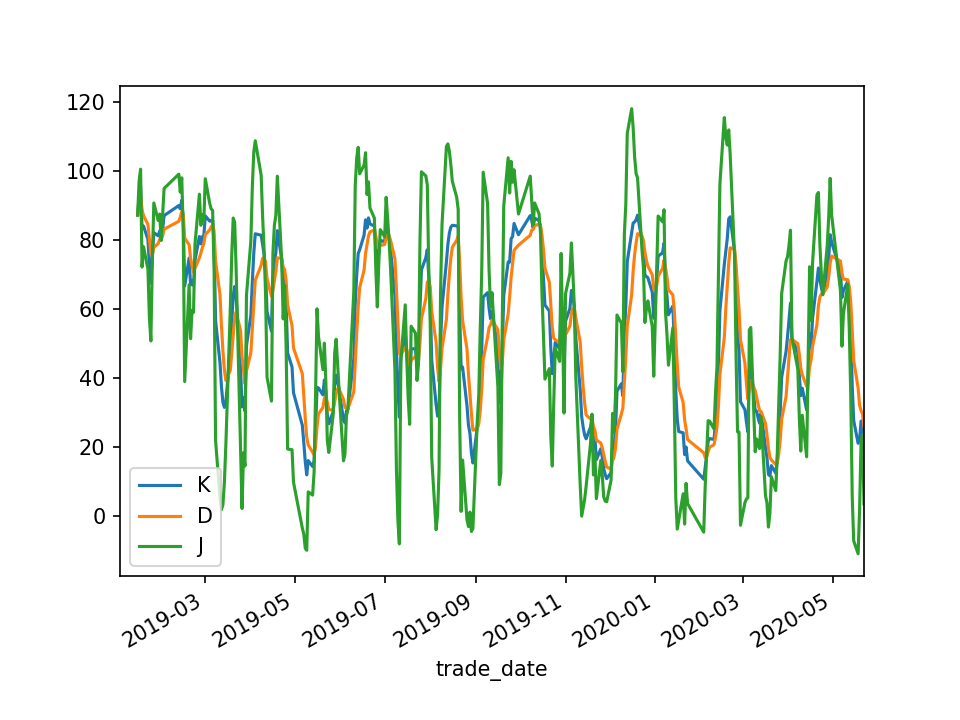

In [26]:
df_whole[['K','D','J']].plot()
plt.show()

1）谁是快线？谁是慢线？
%K为快线，%D为慢线,
D线滞后，某种程度上是向右平移（不是标准的平移，而是滞后就是向右平移）

2）那么什么是第三根%J线？

K线（快速确认线）——也就是说可以快速判断方向（数值范围：10-90，如果大于90的情况下，超买，小于10为超卖）

D线（慢速主干线）——也就是说可以判断趋势方向（数值范围：20-80，如果大于80的情况下，超买，小于20为超卖）

J线（方向敏感线）——也就是我们可以通过J线判断短期头部和底部（数值范围：0-100，如果长时间（5天）大于100的情况，可能会形成短期头部，长时间小于0，可能会形成短期底部）


$K_t = \frac{2}{3}*K_{t-1}+\frac{1}{3}*RSV_t$ <br>
$D_t = \frac{2}{3}*D_{t-1}+\frac{1}{3}*K_t$ <br>
$J_t = 3* K_{t}-2*D_{t} $

<IPython.core.display.Javascript object>


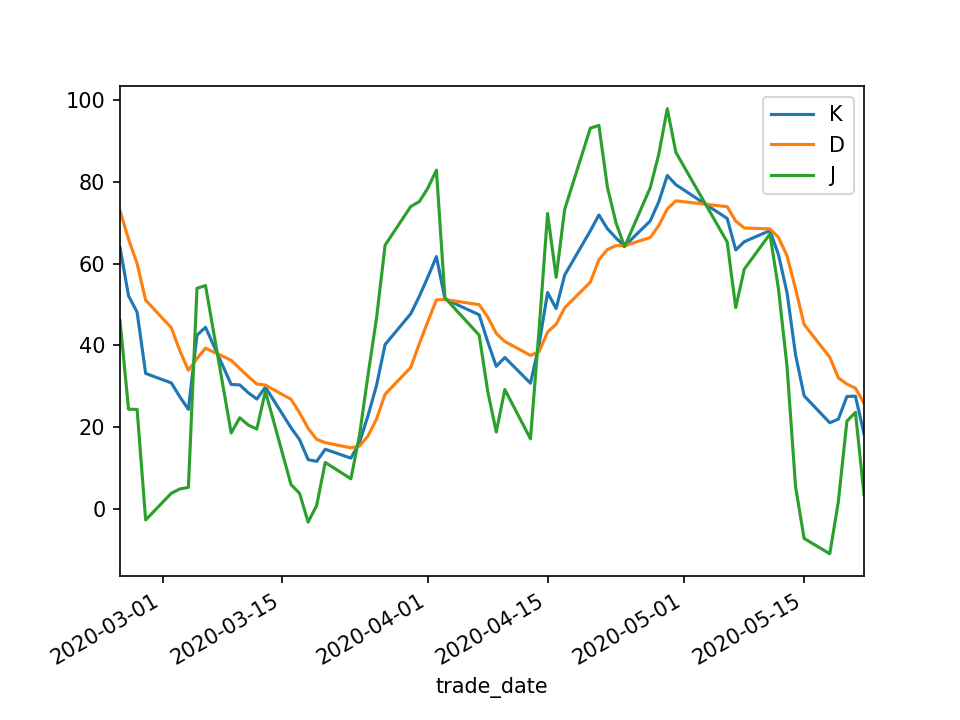

In [27]:
df_whole[['K','D','J']].tail(60).plot()
plt.show()

<IPython.core.display.Javascript object>


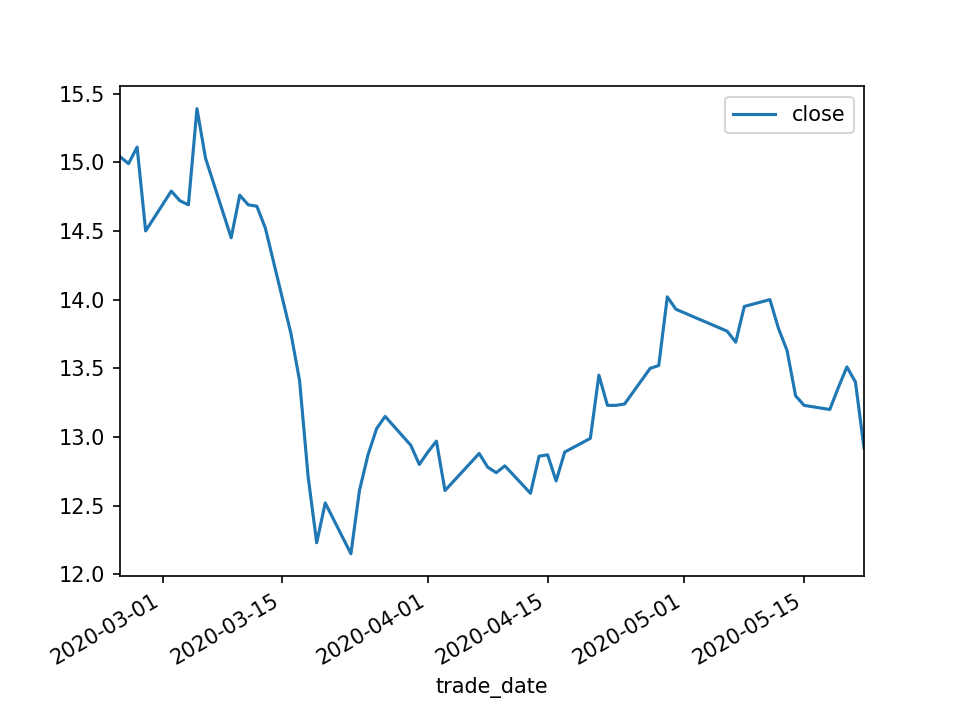

In [28]:
df_whole[['close']].tail(60).plot()
plt.show()

In [29]:
df_whole = df_whole.dropna()

In [30]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K,D,J
trade_date,,,,,,,,,,,,,,
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727,87.272727,87.272727
2019-01-15,000001.SZ,10.11,10.28,10.09,10.24,10.11,0.13,1.2859,542160.55,553027.309,96.460177,92.785197,90.580209,97.195173
2019-01-16,000001.SZ,10.24,10.50,10.23,10.48,10.24,0.24,2.3438,977699.37,1017495.116,98.437500,95.462604,92.892922,100.601966
2019-01-17,000001.SZ,10.54,10.57,10.17,10.25,10.48,-0.23,-2.1947,882811.92,910212.066,66.315789,83.355466,88.931210,72.203977
2019-01-18,000001.SZ,10.34,10.49,10.28,10.43,10.25,0.18,1.7561,738793.26,769973.637,85.263158,84.087802,87.071892,78.119623
2019-01-21,000001.SZ,10.34,10.47,10.32,10.34,10.43,-0.09,-0.8629,659355.76,684465.646,73.563218,80.241977,84.576149,71.573634
2019-01-22,000001.SZ,10.34,10.44,10.26,10.28,10.34,-0.06,-0.5803,424413.57,438991.450,59.154930,72.775995,80.398241,57.531502
2019-01-23,000001.SZ,10.29,10.47,10.29,10.35,10.28,0.07,0.6809,537876.63,559384.396,57.692308,67.543953,75.939505,50.752848
2019-01-24,000001.SZ,10.40,10.55,10.37,10.52,10.35,0.17,1.6425,679240.88,711495.718,90.000000,75.229213,75.696418,74.294804


In [31]:
df_whole['KDJ金叉死叉'] = ''

In [32]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,KDJ金叉死叉
trade_date,,,,,,,,,,,,,,,
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727,87.272727,87.272727,
2019-01-15,000001.SZ,10.11,10.28,10.09,10.24,10.11,0.13,1.2859,542160.55,553027.309,96.460177,92.785197,90.580209,97.195173,
2019-01-16,000001.SZ,10.24,10.50,10.23,10.48,10.24,0.24,2.3438,977699.37,1017495.116,98.437500,95.462604,92.892922,100.601966,
2019-01-17,000001.SZ,10.54,10.57,10.17,10.25,10.48,-0.23,-2.1947,882811.92,910212.066,66.315789,83.355466,88.931210,72.203977,
2019-01-18,000001.SZ,10.34,10.49,10.28,10.43,10.25,0.18,1.7561,738793.26,769973.637,85.263158,84.087802,87.071892,78.119623,
2019-01-21,000001.SZ,10.34,10.47,10.32,10.34,10.43,-0.09,-0.8629,659355.76,684465.646,73.563218,80.241977,84.576149,71.573634,
2019-01-22,000001.SZ,10.34,10.44,10.26,10.28,10.34,-0.06,-0.5803,424413.57,438991.450,59.154930,72.775995,80.398241,57.531502,
2019-01-23,000001.SZ,10.29,10.47,10.29,10.35,10.28,0.07,0.6809,537876.63,559384.396,57.692308,67.543953,75.939505,50.752848,
2019-01-24,000001.SZ,10.40,10.55,10.37,10.52,10.35,0.17,1.6425,679240.88,711495.718,90.000000,75.229213,75.696418,74.294804,


对K与D做判断

如何自动化找关键点：

In [34]:
KDJ_Cross_Bool = df_whole['K'] > df_whole['D']

In [35]:
KDJ_Cross_Bool

trade_date
2019-01-14    False
2019-01-15     True
2019-01-16     True
2019-01-17    False
2019-01-18    False
2019-01-21    False
2019-01-22    False
2019-01-23    False
2019-01-24    False
2019-01-25     True
2019-01-28     True
2019-01-29     True
2019-01-30    False
2019-01-31     True
2019-02-01     True
2019-02-11     True
2019-02-12     True
2019-02-13     True
2019-02-14    False
2019-02-15    False
2019-02-18    False
2019-02-19    False
2019-02-20    False
2019-02-21    False
2019-02-22     True
2019-02-25     True
2019-02-26     True
2019-02-27     True
2019-02-28     True
2019-03-01     True
              ...  
2020-04-08    False
2020-04-09    False
2020-04-10    False
2020-04-13    False
2020-04-14     True
2020-04-15     True
2020-04-16     True
2020-04-17     True
2020-04-20     True
2020-04-21     True
2020-04-22     True
2020-04-23     True
2020-04-24    False
2020-04-27     True
2020-04-28     True
2020-04-29     True
2020-04-30     True
2020-05-06    False
2020-05-0

In [39]:
KDJ_Cross_Bool_Tomorrow = KDJ_Cross_Bool.shift()

In [50]:
df_whole.loc[KDJ_Cross_Bool[(KDJ_Cross_Bool ==True)&(KDJ_Cross_Bool_Tomorrow ==False)].index,'KDJ金叉死叉'] = '金叉' 

In [51]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,KDJ金叉死叉
trade_date,,,,,,,,,,,,,,,
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727,87.272727,87.272727,
2019-01-15,000001.SZ,10.11,10.28,10.09,10.24,10.11,0.13,1.2859,542160.55,553027.309,96.460177,92.785197,90.580209,97.195173,金叉
2019-01-16,000001.SZ,10.24,10.50,10.23,10.48,10.24,0.24,2.3438,977699.37,1017495.116,98.437500,95.462604,92.892922,100.601966,
2019-01-17,000001.SZ,10.54,10.57,10.17,10.25,10.48,-0.23,-2.1947,882811.92,910212.066,66.315789,83.355466,88.931210,72.203977,
2019-01-18,000001.SZ,10.34,10.49,10.28,10.43,10.25,0.18,1.7561,738793.26,769973.637,85.263158,84.087802,87.071892,78.119623,
2019-01-21,000001.SZ,10.34,10.47,10.32,10.34,10.43,-0.09,-0.8629,659355.76,684465.646,73.563218,80.241977,84.576149,71.573634,
2019-01-22,000001.SZ,10.34,10.44,10.26,10.28,10.34,-0.06,-0.5803,424413.57,438991.450,59.154930,72.775995,80.398241,57.531502,
2019-01-23,000001.SZ,10.29,10.47,10.29,10.35,10.28,0.07,0.6809,537876.63,559384.396,57.692308,67.543953,75.939505,50.752848,
2019-01-24,000001.SZ,10.40,10.55,10.37,10.52,10.35,0.17,1.6425,679240.88,711495.718,90.000000,75.229213,75.696418,74.294804,


In [58]:
df_whole.loc[KDJ_Cross_Bool[(KDJ_Cross_Bool ==False)&(KDJ_Cross_Bool_Tomorrow ==True)].index,'KDJ金叉死叉'] = '死叉' 

In [59]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,KDJ金叉死叉
trade_date,,,,,,,,,,,,,,,
2019-01-14,000001.SZ,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882,87.272727,87.272727,87.272727,87.272727,
2019-01-15,000001.SZ,10.11,10.28,10.09,10.24,10.11,0.13,1.2859,542160.55,553027.309,96.460177,92.785197,90.580209,97.195173,金叉
2019-01-16,000001.SZ,10.24,10.50,10.23,10.48,10.24,0.24,2.3438,977699.37,1017495.116,98.437500,95.462604,92.892922,100.601966,
2019-01-17,000001.SZ,10.54,10.57,10.17,10.25,10.48,-0.23,-2.1947,882811.92,910212.066,66.315789,83.355466,88.931210,72.203977,死叉
2019-01-18,000001.SZ,10.34,10.49,10.28,10.43,10.25,0.18,1.7561,738793.26,769973.637,85.263158,84.087802,87.071892,78.119623,
2019-01-21,000001.SZ,10.34,10.47,10.32,10.34,10.43,-0.09,-0.8629,659355.76,684465.646,73.563218,80.241977,84.576149,71.573634,
2019-01-22,000001.SZ,10.34,10.44,10.26,10.28,10.34,-0.06,-0.5803,424413.57,438991.450,59.154930,72.775995,80.398241,57.531502,
2019-01-23,000001.SZ,10.29,10.47,10.29,10.35,10.28,0.07,0.6809,537876.63,559384.396,57.692308,67.543953,75.939505,50.752848,
2019-01-24,000001.SZ,10.40,10.55,10.37,10.52,10.35,0.17,1.6425,679240.88,711495.718,90.000000,75.229213,75.696418,74.294804,


In [64]:
df_whole.to_csv("C:/Users/yons/Desktop/stock_database/00001.csv",encoding = 'gbk')